<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-luiscruzn/blob/main/Actividad_Semanal_7_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y analítica de datos**

##**Actividad Semanal -- 7 Regresión**

###**Profra:** Dra. María de la Paz Rico Fernández.

###**Alumno:** Luis Salvador Cruz Nájera

###**Matrícula:** A01002111

###**Fecha:** 9 de noviembre de 2022

#**Notebook 1. Regresión.**#

###Este notebook ya lo vimos en clase, sin embargo solo le aplicamos regresión lineal y polinomial al ejercicio 1. Ahora realizarás lo siguiente:###

###Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.###

###Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).###

#Regresión Lineal.#

###Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.###

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1].to_frame()

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.head()

,Number of Units
643,4.978922
158,3.125820
977,7.311213
429,4.225077
941,6.600897


In [6]:
list_mae = list()
list_r2 = list()
list_rmse = list()

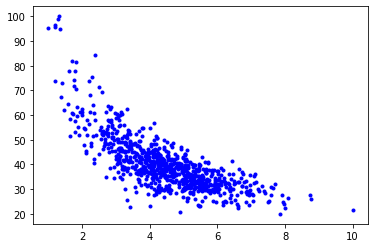

In [7]:
plt.plot(X_train, y_train,'b.')

In [8]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

print("Coeficiente: ", linear_reg.coef_)
print("Intercepto: ", linear_reg.intercept_)

Coeficiente:  [[-6.14066196]]
Intercepto:  [67.51071464]


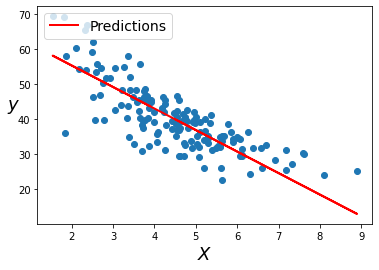

In [9]:
y_pred = linear_reg.predict(X_val)

plt.scatter(X_val, y_val)
plt.plot(X_val, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

#**Ecuación:**#

\begin{align}
\hat{y} = -6.14x + 67.51
\end{align}

In [10]:
mae = metrics.mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', rmse)
print('r2_score',r2)

list_mae.append(mae)
list_r2.append(rmse)
list_rmse.append(r2)

Error medio Absoluto (MAE): 4.476124068321028
Root Mean Squared Error: 5.809995849705496
r2_score 0.6171546016469538


#Regresión Polinomial.#

###Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.###

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_train.shape

(850, 2)

In [13]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_poly_train, y_train)

print("Coeficiente: ", linear_reg.coef_)
print("Intercepto: ", linear_reg.intercept_)

Coeficiente:  [[-17.53372296   1.24487581]]
Intercepto:  [91.35921715]


#**Ecuación:**#

\begin{align}
\hat{y} = -17.53x + 1.24x^2 + 91.35
\end{align}

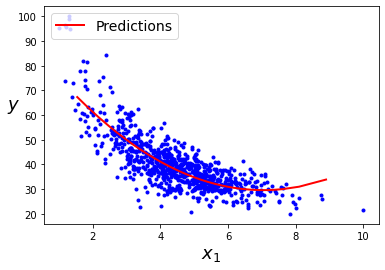

In [14]:
order = np.argsort(X_val.values.ravel())
X_poly_val = poly_features.fit_transform(X_val)
y_pred = linear_reg.predict(X_poly_val)
plt.plot(X_train, y_train, "b.")
plt.plot(X_val.to_numpy()[order], y_pred[order], "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [15]:
mae = metrics.mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', rmse)
print('r2_score',r2)

list_mae.append(mae)
list_r2.append(rmse)
list_rmse.append(r2)

Error medio Absoluto (MAE): 4.210513366450576
Root Mean Squared Error: 5.552673677967162
r2_score 0.6503157354529492


###Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.###

#Regresión Ridge Lineal.#

In [16]:
ridge_reg = Ridge(alpha=5, fit_intercept=True)
ridge_reg.fit(X_train, y_train)

print("Coeficiente: ", ridge_reg.coef_)
print("Intercepto: ", ridge_reg.intercept_)

Coeficiente:  [[-6.12032652]]
Intercepto:  [67.4198767]


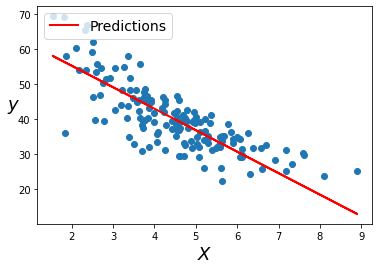

In [17]:
y_pred = ridge_reg.predict(X_val)

plt.scatter(X_val, y_val)
plt.plot(X_val, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

#**Ecuación:**#

\begin{align}
\hat{y} = -6.12x + 67.41
\end{align}

In [18]:
mae = metrics.mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', rmse)
print('r2_score',r2)

list_mae.append(mae)
list_r2.append(rmse)
list_rmse.append(r2)

Error medio Absoluto (MAE): 4.473472449536886
Root Mean Squared Error: 5.805593482543649
r2_score 0.617734563323477


#Regresión Ridge Polinomial.#

In [19]:
ridge_poly_reg = Ridge(fit_intercept=True)
ridge_poly_reg.fit(X_poly_train, y_train)

print("Coeficiente: ", linear_reg.coef_)
print("Intercepto: ", linear_reg.intercept_)

Coeficiente:  [[-17.53372296   1.24487581]]
Intercepto:  [91.35921715]


#**Ecuación:**#

\begin{align}
\hat{y} = -17.53x + 1.24x^2 + 91.35
\end{align}

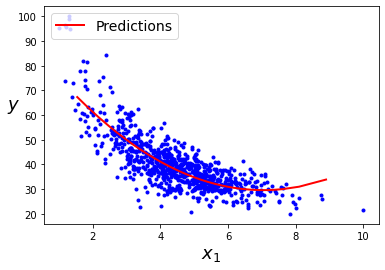

In [20]:
order = np.argsort(X_val.values.ravel())
X_poly_val = poly_features.fit_transform(X_val)
y_pred = linear_reg.predict(X_poly_val)
plt.plot(X_train, y_train, "b.")
plt.plot(X_val.to_numpy()[order], y_pred[order], "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [21]:
mae = metrics.mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', rmse)
print('r2_score',r2)

list_mae.append(mae)
list_r2.append(rmse)
list_rmse.append(r2)

Error medio Absoluto (MAE): 4.210513366450576
Root Mean Squared Error: 5.552673677967162
r2_score 0.6503157354529492


#Regresión Lasso Lineal.#

In [22]:
lasso_linearreg = Lasso(alpha=5, fit_intercept=True)
lasso_linearreg.fit(X_train, y_train)

print("Coeficiente: ", lasso_linearreg.coef_)
print("Intercepto: ", lasso_linearreg.intercept_)

Coeficiente:  [-3.31644712]
Intercepto:  [54.8950072]


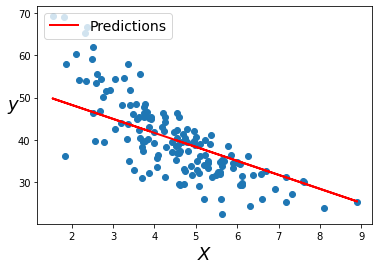

In [23]:
y_pred = lasso_linearreg.predict(X_val)

plt.scatter(X_val, y_val)
plt.plot(X_val, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

#**Ecuación:**#

\begin{align}
\hat{y} = -3.31x + 54.89
\end{align}

In [24]:
mae = metrics.mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', rmse)
print('r2_score',r2)

list_mae.append(mae)
list_r2.append(rmse)
list_rmse.append(r2)

Error medio Absoluto (MAE): 4.8279247900793685
Root Mean Squared Error: 6.4327468944642945
r2_score 0.530684697869921


#Regresión Lasso Polinomial.#

In [25]:
lasso_polyreg = Lasso(fit_intercept=True)
lasso_polyreg.fit(X_poly_train, y_train)

print("Coeficiente: ", lasso_polyreg.coef_)
print("Intercepto: ", lasso_polyreg.intercept_)

Coeficiente:  [-5.57581899 -0.        ]
Intercepto:  [64.98757315]


#**Ecuación:**#

\begin{align}
\hat{y} = -17.27x + 1.21x^2 + 90.79
\end{align}

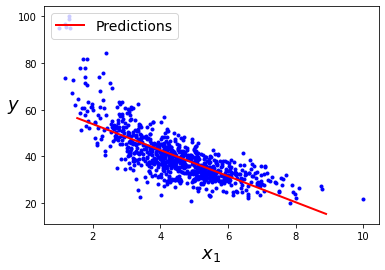

In [26]:
order = np.argsort(X_val.values.ravel())
X_poly_val = poly_features.fit_transform(X_val)
y_pred = lasso_polyreg.predict(X_poly_val)
plt.plot(X_train, y_train, "b.")
plt.plot(X_val.to_numpy()[order], y_pred[order], "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [27]:
mae = metrics.mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', rmse)
print('r2_score',r2)

list_mae.append(mae)
list_r2.append(rmse)
list_rmse.append(r2)

Error medio Absoluto (MAE): 4.435821067963493
Root Mean Squared Error: 5.7365175635060925
r2_score 0.6267769631700428


###Finalmente grafica :###
###MAE (de los cuatro métodos)###
###R2 (de los cuatro métodos)###

###Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?###

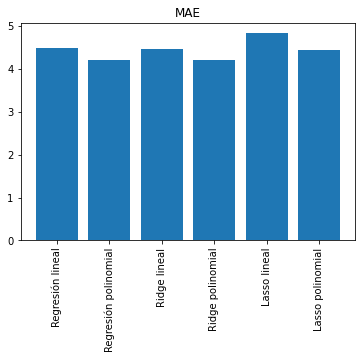

In [31]:
plt.bar(["Regresión lineal", "Regresión polinomial", "Ridge lineal", "Ridge polinomial", "Lasso lineal", "Lasso polinomial"], list_mae)
plt.title("MAE")
plt.xticks(rotation=90)
plt.show()

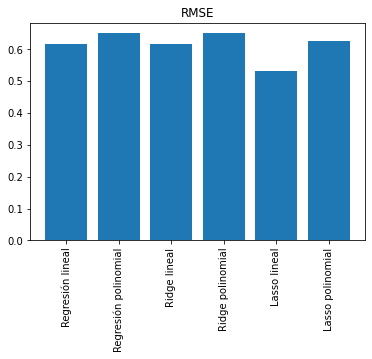

In [32]:
plt.bar(["Regresión lineal", "Regresión polinomial", "Ridge lineal", "Ridge polinomial", "Lasso lineal", "Lasso polinomial"], list_rmse)
plt.title("RMSE")
plt.xticks(rotation=90)
plt.show()

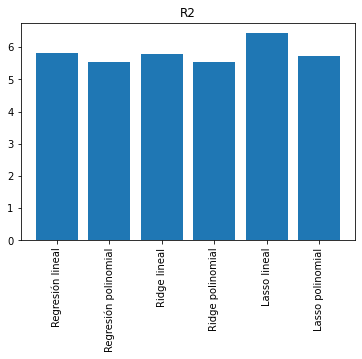

In [33]:
plt.bar(["Regresión lineal", "Regresión polinomial", "Ridge lineal", "Ridge polinomial", "Lasso lineal", "Lasso polinomial"], list_r2)
plt.title("R2")
plt.xticks(rotation=90)
plt.show()

#**Conclusiones**#

####Con los modelos de regresión, como los aplicados en este ejercicio, predecimos o estimamos el valor numérico de una cantidad desconocida, de acuerdo con unas características dadas. La diferencia entre la predicción y el valor real es el error, este es una variable, que puede depender de las características dadas.####


####En la actualidad hay algunas formas para estimar el rendimiento y evaluar el ajuste del modelo, algunas de ellas son: el error cuadrático medio (RMSE, por sus siglas en inglés, root mean squared error), error absoluto medio (MAE, mean absolute error) y R-cuadrada.####

####Por lo que investigamos, la métrica más comúnmente utilizada para las tareas de regresión es el error cuadrático medio (RMSE) y representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado, por lo cual es la que usaremos para evaluar nuestras regresiones####

####El RMSE ndica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de los datos de los valores predichos del modelo. El error cuadratico medio o RMSE es una medida absoluta de ajuste.####

####Los valores más bajos de RMSE indican un mejor ajuste. RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción.####

###1.-¿Qué método conviene más a la empresa, ¿por que?, 

####Seleccionamos el método Lasso Lineal debido que posee un valor más bajo de RMSE comparado con las otras métricas de medición.####

###2.-¿Qué porcentajes de entrenamiento y evaluación usaste?###, 

#### Un 85% para entrenamiento y un 15% para evaluación de los datos####

###3.-¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?###

####La mejor métrica para ajustar el modelo depende de los objetivos del problema. En nuestro caso para el problema de regresión nos basamos en el RMSE a pesar de que algunas veces se aconseja el R cuadrado ajustado, consideramos que es bueno dado que las demás métricas rondan similarmente por el mismo umbral####